In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine.data import diamonds

In [38]:
df = pd.read_csv('../data/pre_processado_data.csv', sep=',')
df['Resolvida']

0         1
1         1
2         1
3         1
4         1
         ..
124000    0
124001    0
124002    0
124003    0
124004    0
Name: Resolvida, Length: 124005, dtype: int64

In [39]:
data_dia = df['Data Finalização'].unique()
data_dia

array(['2021-11-12', '2021-11-17', '2021-11-11', '2021-11-09',
       '2021-11-02', '2021-11-05', '2021-11-29', '2021-11-18',
       '2021-11-08', '2021-11-30', '2021-11-27', '2021-11-26',
       '2021-11-13', '2021-11-06', '2021-11-25', '2021-11-22',
       '2021-11-10', '2021-11-03', '2021-11-24', '2021-11-19',
       '2021-11-04', '2021-11-16', '2021-11-15', '2021-11-14',
       '2021-11-23', '2021-11-20', '2021-11-28', '2021-11-01',
       '2021-11-21', '2021-11-07'], dtype=object)

In [40]:
# Separar por semanas
# Primeira semana: até dia 7
# Segunda semana: do dia 8 até dia 14
# Terceira semana: do dia 15 até dia 21
# Quarta semana: do dia 22 até dia 28
# Quinta semana: do dia 29 até dia 30

df = df.assign(Semana='')
df['Semana']

for linhas in range (len(df)):
    data_finalizacao = df.loc[linhas, 'Data Finalização'].split('-')
    if int(data_finalizacao[2]) <= 7:
        df.loc[linhas, 'Semana'] = 'Primeira Semana'
    elif int(data_finalizacao[2]) > 7 and int(data_finalizacao[2]) <= 14:
        df.loc[linhas, 'Semana'] = 'Segunda Semana'
    elif int(data_finalizacao[2]) > 14 and int(data_finalizacao[2]) <= 21:
        df.loc[linhas, 'Semana'] = 'Terceira Semana'
    elif int(data_finalizacao[2]) > 22 and int(data_finalizacao[2]) <= 28:
        df.loc[linhas, 'Semana'] = 'Quarta Semana'
    else:
        df.loc[linhas, 'Semana'] = 'Quinta Semana'
    

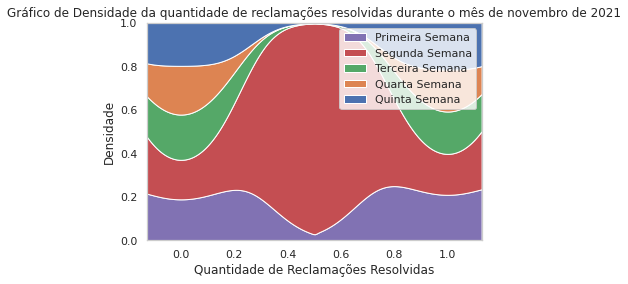

In [41]:
# Verificar a quantidade de reclamações resolvidas por dia
# Serão verificados a densidade de reclamações feitas por semana
sns.set(style="whitegrid")

sns.kdeplot(data=df, x='Resolvida', hue='Semana', common_norm=False, multiple="fill", alpha=1)

plt.title('Gráfico de Densidade da quantidade de reclamações resolvidas durante o mês de novembro de 2021')
plt.legend(['Primeira Semana', 'Segunda Semana', 'Terceira Semana', 'Quarta Semana', 'Quinta Semana'])

plt.xlabel('Quantidade de Reclamações Resolvidas')
plt.ylabel('Densidade')
plt.show()
